https://towardsdatascience.com/probability-for-machine-learning-2cfe4aa13101

# Probability for machine learning
import libraries

In [42]:
import numpy as np
import scipy.stats as stats
from scipy.stats import bernoulli
from scipy.special import factorial
from scipy.spatial.distance import pdist, squareform
import seaborn as sb
import math
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path
from matplotlib.animation import FuncAnimation

import sympy

11.75


Expected Value (mean)

In [ ]:
arr = np.array([10, 5, 19, 13])
print(np.mean(arr))

variance

In [43]:
arr = np.array([10, 5, 19, 13])
print(np.var(arr))

25.6875


standard deviation

In [44]:
arr = np.array([10, 5, 19, 13])
print(np.std(arr))

5.0682837331783235


covariance

In [45]:
arr = np.array([[13, 19, 21], [5, 4, 3]])
print(np.cov(arr))

[[17.33333333 -4.        ]
 [-4.          1.        ]]


gaussian or normal distribution

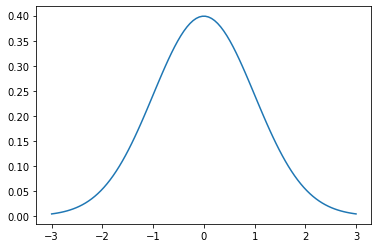

In [46]:
mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

exponential distribution

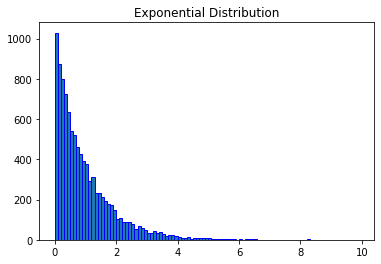

In [47]:
# fixing the seed for reproducibility of the result
np.random.seed(10)
size = 10000

# drawing 10000 sample from exponential distribution
sample = np.random.exponential(1, size)
bin = np.arange(0,10,0.1)

plt.hist(sample, bins=bin, edgecolor='blue')
plt.title("Exponential Distribution")
plt.show()

Gamma distribution

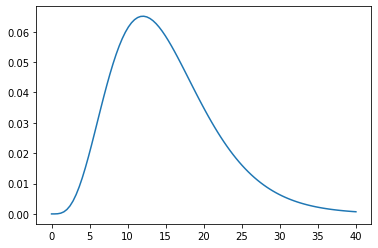

In [48]:
# define x-axis values
x = np.linspace (0, 40, 100)
# calculate pdf of Gamma distribution for each x-value
y = stats.gamma.pdf(x, a=5, scale=3)
plt.plot(x, y)
plt.show()

Binomial distribution

Bernoulli distribution

/tmp/ipykernel_84431/2175838640.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sb.distplot(data_bern,


[Text(0.5, 0, 'Bernouli'), Text(0, 0.5, 'Frequency')]

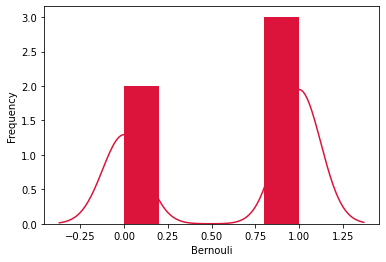

In [49]:
data_bern = bernoulli.rvs(size=1000,p=0.6)
ax = sb.distplot(data_bern,
                 kde=True,
                 color='crimson',
                 hist_kws={"linewidth": 25,'alpha':1}
                 )
ax.set(xlabel='Bernouli', ylabel='Frequency')

Poisson Distribution

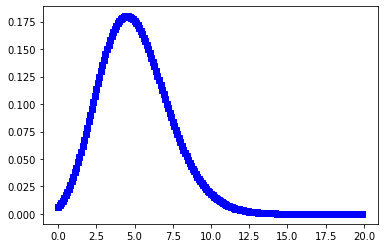

In [50]:
t = np.arange(0, 20, 0.1)
d = np.exp(-5)*np.power(5, t)/factorial(t)

plt.plot(t, d, 'bs')
plt.show()

Boltzmann Distribution

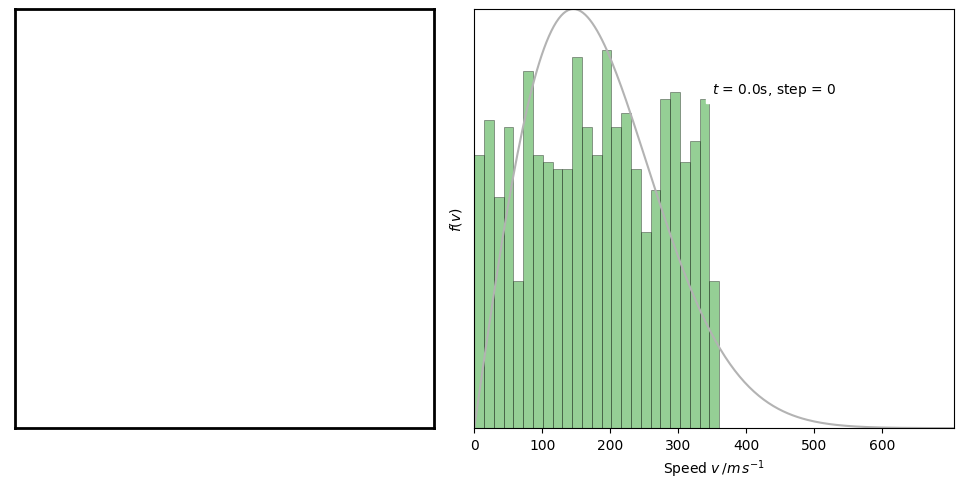

In [51]:
X, Y = 0, 1
class MDSimulation:

    def __init__(self, pos, vel, r, m):
        """
        Initialize the simulation with identical, circular particles of radius
        r and mass m. The n x 2 state arrays pos and vel hold the n particles'
        positions in their rows as (x_i, y_i) and (vx_i, vy_i).

        """

        self.pos = np.asarray(pos, dtype=float)
        self.vel = np.asarray(vel, dtype=float)
        self.n = self.pos.shape[0]
        self.r = r
        self.m = m
        self.nsteps = 0

    def advance(self, dt):
        """Advance the simulation by dt seconds."""

        self.nsteps += 1
        # Update the particles' positions according to their velocities.
        self.pos += self.vel * dt
        # Find indices for all unique collisions.
        dist = squareform(pdist(self.pos))
        iarr, jarr = np.where(dist < 2 * self.r)
        k = iarr < jarr
        iarr, jarr = iarr[k], jarr[k]

        # For each collision, update the velocities of the particles involved.
        for i, j in zip(iarr, jarr):
            pos_i, vel_i = self.pos[i], self.vel[i]
            pos_j, vel_j =  self.pos[j], self.vel[j]
            rel_pos, rel_vel = pos_i - pos_j, vel_i - vel_j
            r_rel = rel_pos @ rel_pos
            v_rel = rel_vel @ rel_pos
            v_rel = 2 * rel_pos * v_rel / r_rel - rel_vel
            v_cm = (vel_i + vel_j) / 2
            self.vel[i] = v_cm - v_rel/2
            self.vel[j] = v_cm + v_rel/2

        # Bounce the particles off the walls where necessary, by reflecting
        # their velocity vectors.
        hit_left_wall = self.pos[:, X] < self.r
        hit_right_wall = self.pos[:, X] > 1 - self.r
        hit_bottom_wall = self.pos[:, Y] < self.r
        hit_top_wall = self.pos[:, Y] > 1 - self.r
        self.vel[hit_left_wall | hit_right_wall, X] *= -1
        self.vel[hit_bottom_wall | hit_top_wall, Y] *= -1

# Number of particles.
n = 1000
# Scaling factor for distance, m-1. The box dimension is therefore 1/rscale.
rscale = 5.e6
# Use the van der Waals radius of Ar, about 0.2 nm.
r = 2e-10 * rscale
# Scale time by this factor, in s-1.
tscale = 1e9    # i.e. time will be measured in nanoseconds.
# Take the mean speed to be the root-mean-square velocity of Ar at 300 K.
sbar = 353 * rscale / tscale
# Time step in scaled time units.
FPS = 30
dt = 1/FPS
# Particle masses, scaled by some factor we're not using yet.
m = 1

# Initialize the particles' positions randomly.
pos = np.random.random((n, 2))
# Initialize the particles velocities with random orientations and random
# magnitudes  around the mean speed, sbar.
theta = np.random.random(n) * 2 * np.pi
s0 = sbar * np.random.random(n)
vel = (s0 * np.array((np.cos(theta), np.sin(theta)))).T

sim = MDSimulation(pos, vel, r, m)

# Set up the Figure and make some adjustments to improve its appearance.
DPI = 100
width, height = 1000, 500
fig = plt.figure(figsize=(width/DPI, height/DPI), dpi=DPI)
fig.subplots_adjust(left=0, right=0.97)
sim_ax = fig.add_subplot(121, aspect='equal', autoscale_on=False)
sim_ax.set_xticks([])
sim_ax.set_yticks([])
# Make the box walls a bit more substantial.
for spine in sim_ax.spines.values():
    spine.set_linewidth(2)

speed_ax = fig.add_subplot(122)
speed_ax.set_xlabel('Speed $v\,/m\,s^{-1}$')
speed_ax.set_ylabel('$f(v)$')

particles, = sim_ax.plot([], [], 'ko')

class Histogram:
    """A class to draw a Matplotlib histogram as a collection of Patches."""

    def __init__(self, data, xmax, nbars, density=False):
        """Initialize the histogram from the data and requested bins."""
        self.nbars = nbars
        self.density = density
        self.bins = np.linspace(0, xmax, nbars)
        self.hist, bins = np.histogram(data, self.bins, density=density)

        # Drawing the histogram with Matplotlib patches owes a lot to
        # https://matplotlib.org/3.1.1/gallery/animation/animated_histogram.html
        # Get the corners of the rectangles for the histogram.
        self.left = np.array(bins[:-1])
        self.right = np.array(bins[1:])
        self.bottom = np.zeros(len(self.left))
        self.top = self.bottom + self.hist
        nrects = len(self.left)
        self.nverts = nrects * 5
        self.verts = np.zeros((self.nverts, 2))
        self.verts[0::5, 0] = self.left
        self.verts[0::5, 1] = self.bottom
        self.verts[1::5, 0] = self.left
        self.verts[1::5, 1] = self.top
        self.verts[2::5, 0] = self.right
        self.verts[2::5, 1] = self.top
        self.verts[3::5, 0] = self.right
        self.verts[3::5, 1] = self.bottom

    def draw(self, ax):
        """Draw the histogram by adding appropriate patches to Axes ax."""
        codes = np.ones(self.nverts, int) * path.Path.LINETO
        codes[0::5] = path.Path.MOVETO
        codes[4::5] = path.Path.CLOSEPOLY
        barpath = path.Path(self.verts, codes)
        self.patch = patches.PathPatch(barpath, fc='tab:green', ec='k',
                                  lw=0.5, alpha=0.5)
        ax.add_patch(self.patch)

    def update(self, data):
        """Update the rectangle vertices using a new histogram from data."""
        self.hist, bins = np.histogram(data, self.bins, density=self.density)
        self.top = self.bottom + self.hist
        self.verts[1::5, 1] = self.top
        self.verts[2::5, 1] = self.top


def get_speeds(vel):
    """Return the magnitude of the (n,2) array of velocities, vel."""
    return np.hypot(vel[:, X], vel[:, Y])

def get_KE(speeds):
    """Return the total kinetic energy of all particles in scaled units."""
    return 0.5 * sim.m * sum(speeds**2)

speeds = get_speeds(sim.vel)
speed_hist = Histogram(speeds, 2 * sbar, 50, density=True)
speed_hist.draw(speed_ax)
speed_ax.set_xlim(speed_hist.left[0], speed_hist.right[-1])
# TODO don't hardcode the upper limit for the histogram speed axis.
ticks = np.linspace(0, 600, 7, dtype=int)
speed_ax.set_xticks(ticks * rscale/tscale)
speed_ax.set_xticklabels([str(tick) for tick in ticks])
speed_ax.set_yticks([])

fig.tight_layout()

# The 2D Maxwell-Boltzmann equilibrium distribution of speeds.
mean_KE = get_KE(speeds) / n
a = sim.m / 2 / mean_KE
# Use a high-resolution grid of speed points so that the exact distribution
# looks smooth.
sgrid_hi = np.linspace(0, speed_hist.bins[-1], 200)
f = 2 * a * sgrid_hi * np.exp(-a * sgrid_hi**2)
mb_line, = speed_ax.plot(sgrid_hi, f, c='0.7')
# Maximum value of the 2D Maxwell-Boltzmann speed distribution.
fmax = np.sqrt(sim.m / mean_KE / np.e)
speed_ax.set_ylim(0, fmax)

# For the distribution derived by averaging, take the abcissa speed points from
# the centre of the histogram bars.
sgrid = (speed_hist.bins[1:] + speed_hist.bins[:-1]) / 2
mb_est_line, = speed_ax.plot([], [], c='r')
mb_est = np.zeros(len(sgrid))

# A text label indicating the time and step number for each animation frame.
xlabel, ylabel = sgrid[-1] / 2, 0.8 * fmax
label = speed_ax.text(xlabel, ylabel, '$t$ = {:.1f}s, step = {:d}'.format(0, 0),
                      backgroundcolor='w')

def init_anim():
    """Initialize the animation"""
    particles.set_data([], [])

    return particles, speed_hist.patch, mb_est_line, label

def animate(i):
    """Advance the animation by one step and update the frame."""
    global sim, verts, mb_est_line, mb_est
    sim.advance(dt)

    particles.set_data(sim.pos[:, X], sim.pos[:, Y])
    particles.set_markersize(0.5)

    speeds = get_speeds(sim.vel)
    speed_hist.update(speeds)

    # Once the simulation has approached equilibrium a bit, start averaging
    # the speed distribution to indicate the approximation to the Maxwell-
    # Boltzmann distribution.
    if i >= IAV_START:
        mb_est += (speed_hist.hist - mb_est) / (i - IAV_START + 1)
        mb_est_line.set_data(sgrid, mb_est)

    label.set_text('$t$ = {:.1f} ns, step = {:d}'.format(i*dt, i))

    return particles, speed_hist.patch, mb_est_line, label

# Only start averaging the speed distribution after frame number IAV_ST.
IAV_START = 200
# Number of frames; set to None to run until explicitly quit.
frames = 1000
anim = FuncAnimation(fig, animate, frames=frames, interval=10, blit=False,
                    init_func=init_anim)

plt.show()